# In Class Assignment 1

## Monday, Jan. 29, 2018

Today's class focuses on Support Vector Machines (SVMs), a method of doing maximum margin classification. 

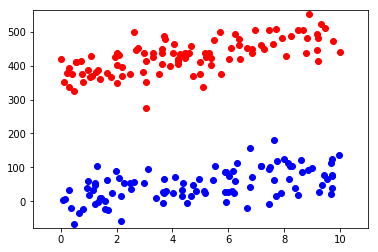

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Generate dummy data and instantiate functions
#Run this cell to initialize homework

N = 100
np.random.seed(15)

x0 = 10*np.random.rand(N)
x1 = 10*np.random.rand(N)
b0 = 500*np.random.rand(1)*np.ones(N)
b1 = np.random.rand(1)*np.ones(N)

y0=10*x0+b0+np.random.normal(0,40,N)
y1=10*x1+b1+np.random.normal(0,40,N)

x=np.zeros((2*N,2))
y=np.zeros((2*N,))
y[:N]=1
y[N:]=-1

for i in range(N):
    x[i,:]=[x0[i],y0[i]]
    x[N+i,:]=[x1[i],y1[i]]
    
plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plt.axis([np.min(x[:,0])-1,np.max(x[:,0])+1,np.min(x[:,1])-10,np.max(x[:,1])+10])

def plotClassifier(B,B0):
    
    x1=np.linspace(0,10,1000)
    x2=-1*(B[0]*x1+B0)/B[1]
    plt.plot(x1,x2,'k',linewidth=4)
    return

def optimize(func,constraint):
    
    print ('Optimizing...(May take some time to run)')
    bound=[(0,None)]*2*N
    lagrange=opt.minimize(func,x0=np.ones(2*N),bounds=bound,constraints={'type': 'eq', 'fun': constraint})

    return lagrange

plt.show()

# Classification

Suppose we're given data points $x_i \in \mathbb{R}^n$ and $y_i \in \{-1,+1\}$, for $i = 1,\dots,N$. 

The $x_i$ are the features and $y_i$ are labels taking values in either $-1$ or $+1$. The $x_i$ could be the pixel intensities in an image of an animal, and $y_i$ could indicate whether the animal is a `cat` or ` dog`, for example. For machine learning, we want to get a good guess of what $y_i$ is from only looking at $x_i$; so, the computer algorithm can take in images and distinguish between cats and dogs. 

## Defining a linear classifier
Our dataset is then $(x_1,y_1),\dots,(x_N,y_N)$.

Now let's fix some parameters $\beta \in \mathbb{R}^n$ and $\beta_0 \in \mathbb{R}$. We can define a hyperplane as:

$$\{ x : x^{T} \beta + \beta_0 = 0 \}$$

This cuts our feature space, $\mathbb{R}^n$, in half. That is, every point in $\mathbb{R}^n$ is either above, below, or on this hyperplane. 

Let:

$$
f(x;\beta,\beta_0) = x^T \beta + \beta_0
$$

Sometimes, when it is obvious, we'll drop the dependence on $\beta,\beta_0$ and just denote this $f(x)$.

We can define a classifier:

$$
G(x) = 
\begin{cases}
+1 & \text{ if } f(x) \geq 0 \\
-1 & \text{ if } f(x) < 0
\end{cases}
$$






# Task 1: Linear Classifier

We begin by creating a function that takes in $\beta$ and $\beta_0$ and outputs a label for each datapoint. Note that $X \in \mathbb{R}^{N \times n}$ is a matrix of $N$ datapoints. In this example, $n = 2$.

In [2]:
def classify(B,B0,X):
         
        return np.sign(X@B + B0)



66 Data points were classified as +1
134 Data points were classified as -1




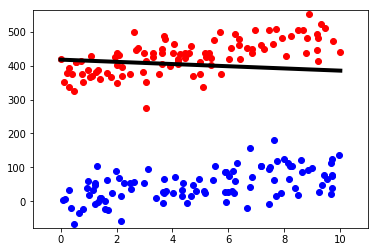

In [5]:
# Run this cell to test a classifier with a random linear separator

test_B=np.random.rand(2)
test_B0=b0[0]/-5.0

print()
print()
print (str(np.sum(classify(test_B,test_B0,x)==1)) + ' Data points were classified as +1')
print (str(np.sum(classify(test_B,test_B0,x)==-1)) + ' Data points were classified as -1')
print()
print()


plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plotClassifier(test_B,test_B0)
plt.axis([np.min(x[:,0])-1,np.max(x[:,0])+1,np.min(x[:,1])-10,np.max(x[:,1])+10])

plt.show()

# Maximum Margin Classification

Having defined a general function that classifies points, we now try to find the maximum margin classifier.

Suppose our dataset is strongly separable. (Sanity check: Is the data we are using separable by a hyperplane?). There are infinitely many hyperplanes that can separate this data. Which one of these separators is 'best'? The answer is the one with the largest margin.

Recall from class that the problem that maximum margin classification is trying to solve is:

\begin{align*}
\min_{\beta,\beta_0}~ & \|\beta\|^2_2 \\
\text{subject to }~		& y_i (x_i^T \beta + \beta_0) \geq 1 \text{ for } i = 1,\dots,N \\
\end{align*}

Note that when we remove the norm constraint, what was the 'margin' before is now equal to $\frac{1}{\|\beta\|_2}$.

## Task 2: Maximum Margin Classifification through duality

We are going to solve this problem by formulating the dual problem. First derive lagrangian of the minimization above. 

$$
L(\beta,\beta_0,\lambda)= ???
$$





Note, the optimization problem is now:


\begin{align*}
 \min_{\beta,\beta_0} \max_{\lambda\ge0}~ &  L(\beta,\beta_0,\lambda)
\end{align*}

Due to the convexity of the problem, we can rewrite this as:

\begin{align*}
\max_{\lambda\ge0} \min_{\beta,\beta_0}~ &  L(\beta,\beta_0,\lambda)
\end{align*}

By solving the now unconstrained minimization:

$$
\min_{\beta,\beta_0} \ \ L(\beta,\beta_0,\lambda)
$$

Formulate a problem in the form:

\begin{align*}
\min_{\lambda\ge0}~ & h(\lambda) \\
\text{subject to }~	& g(\lambda)=0 \\
\end{align*}


(Hint: Solve for the optimality conditions of $\beta$ and $\beta_0$)




## Task 3: Dual Problem Formulation

Note you have access to the data $x_1,...x_N$ and the labels $y_1,...y_N$.

$$
h(\lambda)=???
$$

$$
g(\lambda)=???
$$

Given the dual problem formulation above, we will now use the scikit learn python library to solve the dual, and thus the primal problem. 

In [10]:
# Write out functions h, and g above, taking in the vector of lagrange multipliers lam
# Note, the data x and y are global variables
# Once you have written the functions, we will call scipy-optimize (this is done for you).

def h(lam):
    
    #TODO
    
    return 

def g(lam):
    
    #TODO
    
    return 

Now given the lagrange multipliers, find $\beta$ and $\beta_0$:

In [6]:
# Take in the vector of lagrange multipliers and calculate B, and B_0

def lagrange_to_classifier(lam,x,y):
    
    #TODO
    
    return beta, beta_0

# Final SVM Results:

Optimizing...(May take some time to run)


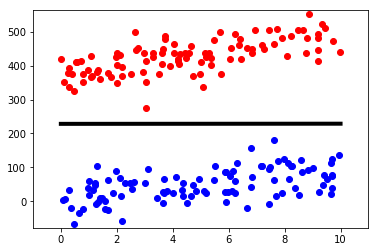

In [7]:
# Run this cell to see the results

lag=optimize(h,g)
B,B0=lagrange_to_classifier(lag.x,x,y)
plt.figure()
plt.plot(x[:N,0],x[:N,1],'ro')
plt.plot(x[N:,0],x[N:,1],'bo')
plotClassifier(B,B0) 
plt.axis([np.min(x[:,0])-1,np.max(x[:,0])+1,np.min(x[:,1])-10,np.max(x[:,1])+10])
plt.show()

The data points that determine the maximum margin are commonly referred to as 'support vectors'. These are the data points $x$ with the maximum value of $|f(x)|$.



Find the support vectors of the maximum margin classifier visually.